In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [3]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv",index_col=0)

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [5]:
#used labelecoding in flight column
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,1408,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,1387,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,1213,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,1559,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,1549,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


<Axes: >

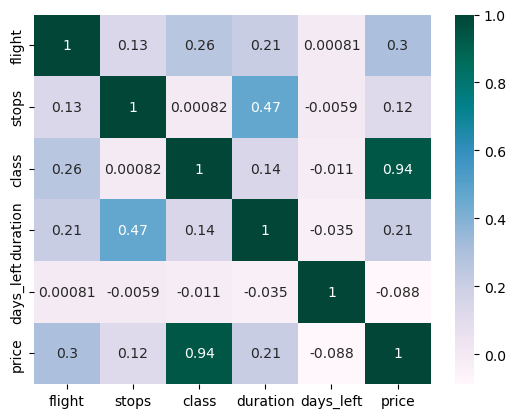

In [7]:
# Reverse the colormap to switch colors
cmap ="PuBuGn"

# Plot the heatmap with the modified color map
sn.heatmap(df.corr(), annot=True, cmap=cmap)

In [21]:
def data_to_one_hot(df):
    # get dummy variables for multiple columns
    dummy_cols = ['airline', 'departure_time','arrival_time','source_city','destination_city']
    df1_dummy = pd.get_dummies(df[dummy_cols])

    # concatenate original DataFrame with dummy variable DataFrame
    df1_concat = pd.concat([df.drop(dummy_cols, axis=1), df1_dummy], axis=1)
    
    # display result
    return df1_concat

def data_label_encoding(df):
    from sklearn.preprocessing import LabelEncoder

    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Specify the list of categorical columns to encode
    categorical_columns = ['airline', 'departure_time','arrival_time','source_city','destination_city']

    # Apply label encoding to each categorical column
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [22]:
def evaluation(model_name,enc,y_test,predictions,train_score,test_score):
    data = [
    ['model name', model_name],
    ['encoding', enc],
    ['MAE', metrics.mean_absolute_error(y_test, predictions)],
    ['MSE', metrics.mean_squared_error(y_test, predictions)],
    ['RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions))],
    ['r2', r2_score(y_test, predictions)],
    ['explained_variance_score', metrics.explained_variance_score(y_test, predictions)],
    ['max_error', metrics.max_error(y_test, predictions)],
    ['mean_absolute_percentage_error', metrics.mean_absolute_percentage_error(y_test, predictions)],
    ['mean_squared_log_error', metrics.mean_squared_log_error(y_test, predictions) if all(x >= 0 for x in y_test)
     and all(y >= 0 for y in predictions) else 'N/A'],
    ['mean_squared_log_error(squared=False)', metrics.mean_squared_log_error(y_test, predictions, squared=False)
     if all(x >= 0 for x in y_test) and all(y >= 0 for y in predictions) else 'N/A'],
    ['test score',test_score],
    ['train score',train_score]
    ]

    
    # Define the headers
    headers = ["metrics", "value"]

    # Display the data in a tabular format
    table = tabulate(data, headers, tablefmt="grid")
    print(table)
    
    transposed_data = list(zip(*data))
    
    return transposed_data[1]

In [23]:
def csv_dump(matrix,filename):
  
    with open(filename, 'a', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(matrix)

In [24]:
def model_random_forest(x_train,y_train,x_test,y_test,enc,filename):

    import time
    start_time = time.time()
    
    print(f'model name :- random forest regression && encoding :-{enc}')
    #model 
    model = RandomForestRegressor(random_state=123)

    #training model input as x_train and y_tarin
    model.fit(x_train,y_train)

    #model is creted show give x test data as input and retuen predictd data 
    predictions = model.predict(x_test)
    
    #scores
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    # evaluation
    eva_matrix = evaluation('random forest',enc,y_test,predictions,train_score,test_score)
    
    #dump in csv 
    csv_dump(list(eva_matrix),filename)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    

In [25]:
def model_linear_regression(x_train,y_train,x_test,y_test,enc,filename):

    import time
    start_time = time.time()
    
    print(f'model name :- linear regression && encoding :-{enc}')
    #model 
    model = LinearRegression()

    #training model input as x_train and y_tarin
    model.fit(x_train,y_train)

    #model is creted show give x test data as input and retuen predictd data 
    predictions = model.predict(x_test)
       
    #scores
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    # evaluation
    eva_matrix = evaluation('linear regression',enc,y_test,predictions,train_score,test_score)
    
    #dump in csv 
    csv_dump(list(eva_matrix),filename)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    

In [26]:
def model_lasso(x_train,y_train,x_test,y_test,enc,filename):
    
    import time
    start_time = time.time()
    print(f'model name :- lasso regression && encoding :-{enc}')
    # Create a Lasso regression model
    lasso = Lasso(alpha=0.1) 

    # Fit the model to the training data
    lasso.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = lasso.predict(x_test)
    
    # evaluation
    eva_matrix = evaluation('lasso',enc,y_test,predictions,'N/A','N/A')
    
    #dump in csv 
    csv_dump(list(eva_matrix),filename)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")

In [27]:
def model_gradiant_boosting(x_train,y_train,x_test,y_test,enc,filename):
    import time

    start_time = time.time()

    #import model from sklearn
    from sklearn.ensemble import GradientBoostingRegressor
    print(f'model name :- gradiant boosting regression && encoding:- {enc}')

    model = GradientBoostingRegressor(random_state=123)

    #training model input as x_train and y_tarin
    model.fit(x_train,y_train)
    
    #model is creted show give x test data as input and retuen predictd data 
    predictions = model.predict(x_test)
    
    #scores
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)

    # evaluation
    eva_matrix = evaluation('gradiant boosting',enc,y_test,predictions,train_score,test_score)
    
    #dump in csv 
    csv_dump(list(eva_matrix),filename)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")

In [28]:
def model_svr(x_train,y_train,x_test,y_test,enc,filename):
    import time

    start_time = time.time()

    print(f'model name :- SVR && encoding:- {enc}')

    model = SVR()

    #training model input as x_train and y_tarin
    model.fit(x_train,y_train)

    #model is creted show give x test data as input and retuen predictd data 
    predictions = svr.predict(x_test)
    
    #scores
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)

    # evaluation
    eva_matrix = evaluation('svr',enc,y_test,predictions,train_score,test_score)
    
    #dump in csv 
    csv_dump(list(eva_matrix),filename)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")

In [29]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,1408,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,1387,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,1213,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,1559,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,1549,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [30]:
#main script
filename = '/home/growlt199/Downloads/manufacturing_project/model_training/model_training_difmodels/evaluation_dif_models.csv'
    
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['model name ','encoding',
                        'mae','mse','rmse','r2',
                        'explained_variance_score', 'max_error',
                        'mean_absolute_percentage_error', 'mean_squared_log_error', 
                        'mean_squared_log_error(squared=False)',
                        'test_score','train_score']) 
    
list_models = ['model_random_forest','model_linear_regression','model_gradiant_boosting'
               ,'model_lasso']
encoding = ['data_to_one_hot','data_label_encoding']

for model in list_models:
    for enc in encoding:
        model_fuc = globals().get(model)
        enc_fuc = globals().get(enc)
        
        #encoding
        df1 = enc_fuc(df)
        
        #create x and y where x are features for the model and y as target
        x = df1.drop('price',axis=1)
        y = df1['price']
        
        #split data
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =123, shuffle=True)
        
        model_fuc(x_train,y_train,x_test,y_test,enc,filename)

model name :- random forest regression && encoding :-data_to_one_hot
+---------------------------------------+----------------------+
| metrics                               | value                |
+=======================================+======================+
| model name                            | random forest        |
+---------------------------------------+----------------------+
| encoding                              | data_to_one_hot      |
+---------------------------------------+----------------------+
| MAE                                   | 843.0085962109812    |
+---------------------------------------+----------------------+
| MSE                                   | 4768919.130378531    |
+---------------------------------------+----------------------+
| RMSE                                  | 2183.785504663526    |
+---------------------------------------+----------------------+
| r2                                    | 0.9905724772204141   |
+--------------------

+---------------------------------------+---------------------+
| metrics                               | value               |
+=======================================+=====================+
| model name                            | gradiant boosting   |
+---------------------------------------+---------------------+
| encoding                              | data_label_encoding |
+---------------------------------------+---------------------+
| MAE                                   | 2723.4541742682577  |
+---------------------------------------+---------------------+
| MSE                                   | 19942277.952898536  |
+---------------------------------------+---------------------+
| RMSE                                  | 4465.677770831493   |
+---------------------------------------+---------------------+
| r2                                    | 0.960576752396541   |
+---------------------------------------+---------------------+
| explained_variance_score              

# comparing different model accuracy and other evaluation matrix

In [31]:
results = pd.read_csv('/home/growlt199/Downloads/manufacturing_project/model_training/model_training_difmodels/evaluation_dif_models.csv')

In [32]:
results.head()

,model name,encoding,mae,mse,rmse,r2,explained_variance_score,max_error,mean_absolute_percentage_error,mean_squared_log_error,mean_squared_log_error(squared=False),test_score,train_score
0,random forest,data_to_one_hot,843.008596,4.768919e+06,2183.785505,0.990572,0.990574,43954.130000,0.058572,0.014931,0.122194,0.990572,0.998609
1,random forest,data_label_encoding,862.487129,4.972865e+06,2229.992054,0.990169,0.990171,42265.070000,0.059365,0.015212,0.123335,0.990169,0.998568
2,linear regression,data_to_one_hot,4469.061976,4.547684e+07,6743.651467,0.910098,0.910099,40637.716449,0.417036,NaN,NaN,0.910098,0.910409
3,linear regression,data_label_encoding,4469.061976,4.547684e+07,6743.651467,0.910098,0.910099,40637.716449,0.417036,NaN,NaN,0.910098,0.910409
4,gradiant boosting,data_to_one_hot,2723.454174,1.994228e+07,4465.677771,0.960577,0.960577,47128.383506,0.202557,0.066503,0.257881,0.960577,0.960754


In [33]:
results.sort_values(['mae','r2'], ascending=True)

,model name,encoding,mae,mse,rmse,r2,explained_variance_score,max_error,mean_absolute_percentage_error,mean_squared_log_error,mean_squared_log_error(squared=False),test_score,train_score
0,random forest,data_to_one_hot,843.008596,4.768919e+06,2183.785505,0.990572,0.990574,43954.130000,0.058572,0.014931,0.122194,0.990572,0.998609
1,random forest,data_label_encoding,862.487129,4.972865e+06,2229.992054,0.990169,0.990171,42265.070000,0.059365,0.015212,0.123335,0.990169,0.998568
5,gradiant boosting,data_label_encoding,2723.454174,1.994228e+07,4465.677771,0.960577,0.960577,47128.383506,0.202557,0.066503,0.257881,0.960577,0.960754
4,gradiant boosting,data_to_one_hot,2723.454174,1.994228e+07,4465.677771,0.960577,0.960577,47128.383506,0.202557,0.066503,0.257881,0.960577,0.960754
7,lasso,data_label_encoding,4469.006921,4.547685e+07,6743.652636,0.910098,0.910099,40636.564956,0.417014,NaN,NaN,NaN,NaN
6,lasso,data_to_one_hot,4469.007127,4.547685e+07,6743.652641,0.910098,0.910099,40636.560208,0.417014,NaN,NaN,NaN,NaN
3,linear regression,data_label_encoding,4469.061976,4.547684e+07,6743.651467,0.910098,0.910099,40637.716449,0.417036,NaN,NaN,0.910098,0.910409
2,linear regression,data_to_one_hot,4469.061976,4.547684e+07,6743.651467,0.910098,0.910099,40637.716449,0.417036,NaN,NaN,0.910098,0.910409


# now random forest regression is base model 